In [21]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer
from gluonnlp.data import SentencepieceTokenizer

In [22]:
data_path = './data_in/KOR'
train_sts = os.path.join(data_path, 'KorSTS', 'sts-train.tsv')
train_data = pd.read_csv(train_sts, sep='\t', quoting = 3)
train_data.head(10)

,genre,filename,year,id,score,sentence1,sentence2
0,main-captions,MSRvid,2012test,1,5.00,비행기가 이륙하고 있다.,비행기가 이륙하고 있다.
1,main-captions,MSRvid,2012test,4,3.80,한 남자가 큰 플루트를 연주하고 있다.,남자가 플루트를 연주하고 있다.
2,main-captions,MSRvid,2012test,5,3.80,한 남자가 피자에 치즈를 뿌려놓고 있다.,한 남자가 구운 피자에 치즈 조각을 뿌려놓고 있다.
3,main-captions,MSRvid,2012test,6,2.60,세 남자가 체스를 하고 있다.,두 남자가 체스를 하고 있다.
4,main-captions,MSRvid,2012test,9,4.25,한 남자가 첼로를 연주하고 있다.,자리에 앉은 남자가 첼로를 연주하고 있다.
5,main-captions,MSRvid,2012test,11,4.25,몇몇 남자들이 싸우고 있다.,두 남자가 싸우고 있다.
6,main-captions,MSRvid,2012test,12,0.50,남자가 담배를 피우고 있다.,남자가 스케이트를 타고 있다.
7,main-captions,MSRvid,2012test,13,1.60,남자가 피아노를 치고 있다.,남자가 기타를 연주하고 있다.
8,main-captions,MSRvid,2012test,14,2.20,한 남자가 기타를 치고 노래를 부르고 있다.,한 여성이 어쿠스틱 기타를 연주하고 노래를 부르고 있다.
9,main-captions,MSRvid,2012test,16,5.00,사람이 고양이를 천장에 던지고 있다.,사람이 고양이를 천장에 던진다.


In [3]:
print(f'전체 train_data 개수: {len(train_data)}')

전체 train_data 개수: 5749


In [4]:
train_set = pd.Series(train_data['sentence1'].tolist() + train_data['sentence2'].tolist()).astype(str)
train_set.head()

0             비행기가 이륙하고 있다.
1     한 남자가 큰 플루트를 연주하고 있다.
2    한 남자가 피자에 치즈를 뿌려놓고 있다.
3          세 남자가 체스를 하고 있다.
4        한 남자가 첼로를 연주하고 있다.
dtype: object

In [6]:
print(f'전체 문장 개수: {len(train_set)}')
print(f'유일한 총 문장 수: {len(np.unique(train_set))}')
print(f'반복해서 나타나는 문장의 수: {np.sum(train_set.value_counts() > 1)}')

전체 문장 개수: 11498
유일한 총 문장 수: 10383
반복해서 나타나는 문장의 수: 716


d:\anaconda3\envs\w\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number of sentence')

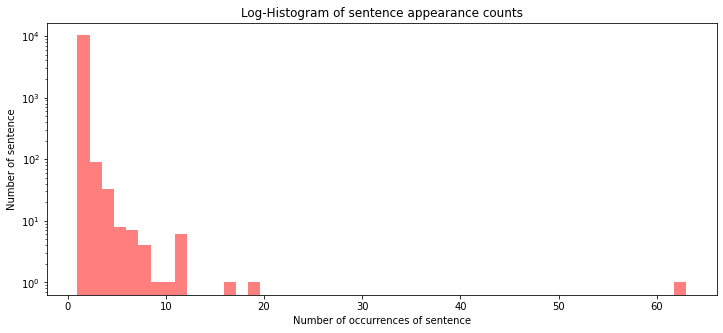

In [7]:
plt.figure(figsize=(12, 5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of sentence appearance counts')
plt.xlabel('Number of occurrences of sentence')
plt.ylabel('Number of sentence')

In [8]:
print(f'중복 최대 개수: {np.max(train_set.value_counts())}')
print(f'중복 최소 개수: {np.min(train_set.value_counts())}')
print(f'중복 평균 개수: {np.mean(train_set.value_counts())}')
print(f'중복 표준편차: {np.std(train_set.value_counts())}')
print(f'중복 중간길이: {np.median(train_set.value_counts())}')
print(f'제 1 사분위 중복: {np.percentile(train_set.value_counts(), 25)}')
print(f'제 3 사분위 중복: {np.percentile(train_set.value_counts(), 75)}')

중복 최대 개수: 63
중복 최소 개수: 1
중복 평균 개수: 1.1073870750264856
중복 표준편차: 0.811720901928673
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x186533d6a48>,
 'caps': [<matplotlib.lines.Line2D at 0x186532ffe88>,
 'boxes': [<matplotlib.lines.Line2D at 0x186533f1dc8>],
 'medians': [<matplotlib.lines.Line2D at 0x186533f6b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x18653390ec8>],
 'means': [<matplotlib.lines.Line2D at 0x186533f6308>]}

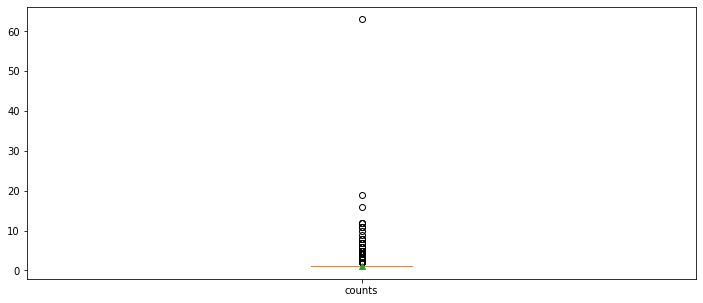

In [9]:
plt.figure(figsize=(12, 5))
plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

In [10]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case = False)
train_bert_token_cased_counts = train_set.apply(lambda x: len(tokenizer.tokenize(x)))

Text(0, 0.5, 'Probability')

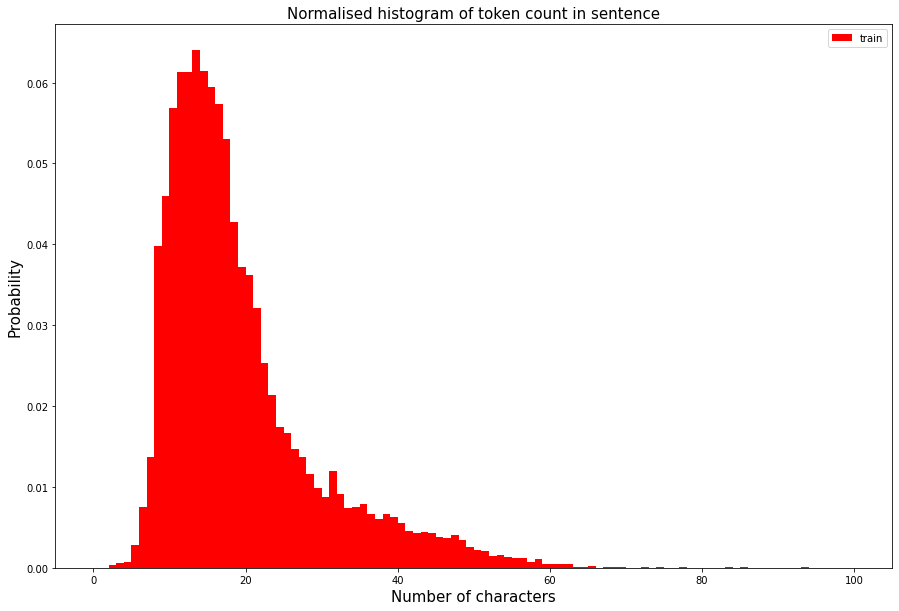

In [11]:
plt.figure(figsize=(15, 10))
plt.hist(train_bert_token_cased_counts, bins=100, range=[0,100], facecolor='r', density=True, label='train')
plt.title("Normalised histogram of token count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [16]:
print(f'문장 token 최대 개수: {np.max(train_bert_token_cased_counts)}')
print(f'문장 token 최소 개수: {np.min(train_bert_token_cased_counts)}')
print(f'문장 token 평균 개수: {np.mean(train_bert_token_cased_counts):1f}')
print(f'문장 token 표준편차: {np.std(train_bert_token_cased_counts):1f}')
print(f'문장 token 중간 값: {np.median(train_bert_token_cased_counts)}')
print(f'문장 token 제 1 사분위: {np.percentile(train_bert_token_cased_counts, 25)}')
print(f'문장 token 제 3 사분위: {np.percentile(train_bert_token_cased_counts, 75)}')
print(f'문장 token 99%: {np.percentile(train_bert_token_cased_counts, 99)}')

문장 token 최대 개수: 102
문장 token 최소 개수: 2
문장 token 평균 개수: 18.740303
문장 token 표준편차: 10.121778
문장 token 중간 값: 16.0
문장 token 제 1 사분위: 12.0
문장 token 제 3 사분위: 22.0
문장 token 99%: 53.0


{'whiskers': [<matplotlib.lines.Line2D at 0x18653b9d0c8>,
 'caps': [<matplotlib.lines.Line2D at 0x18653380b08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1865350ab48>],
 'medians': [<matplotlib.lines.Line2D at 0x18653423608>],
 'fliers': [<matplotlib.lines.Line2D at 0x186533f9088>],
 'means': [<matplotlib.lines.Line2D at 0x18653350d48>]}

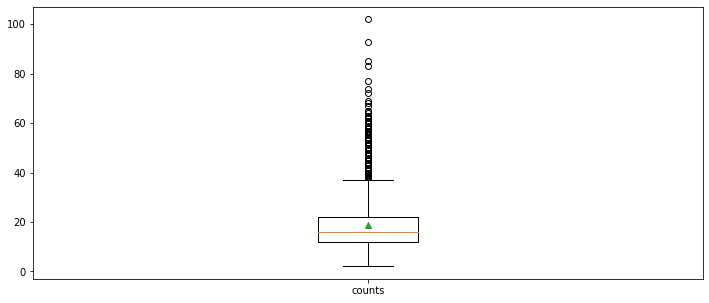

In [17]:
plt.figure(figsize=(12, 5))
plt.boxplot([train_bert_token_cased_counts],
             labels=['counts'],
             showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

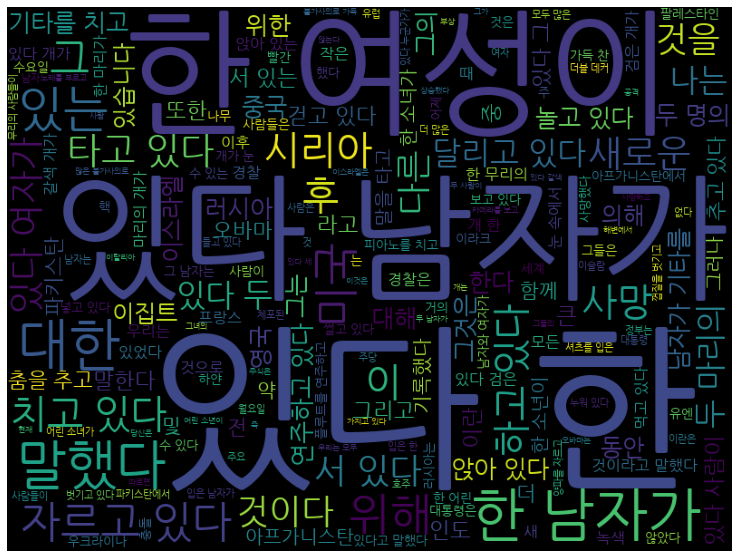

In [29]:
from wordcloud import WordCloud
font_path = os.path.join(data_path, 'NanumGothic.ttf')
cloud = WordCloud(font_path = font_path, width = 800, height=600).generate(
        " ".join(train_set.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

<AxesSubplot:>

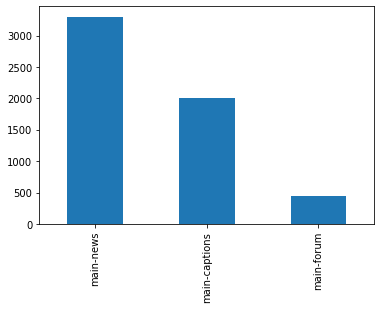

In [30]:
train_data.genre.value_counts().plot(kind='bar')

<AxesSubplot:>

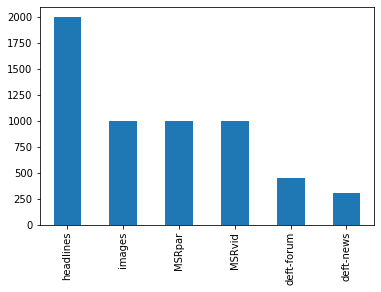

In [31]:
train_data.filename.value_counts().plot(kind='bar')

<AxesSubplot:>

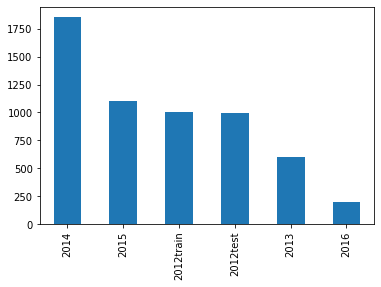

In [32]:
train_data.year.value_counts().plot(kind='bar')

<AxesSubplot:>

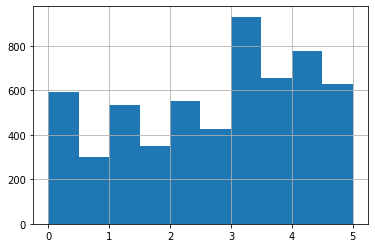

In [33]:
train_data.score.hist()